In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("data/data_understanding_output.csv", skipinitialspace=True)

In [3]:
df.head()

,word,length,arousal,valence,dominance,concreteness,imageability,familiarity,aoa,semsize,gender,polysemy,log_freq,number_of_meanings,avg_variance_between_meanings,PoS,sentiment
0,abattoir,8,4.200,2.864,4.333,5.455,4.391,2.382,6.760,4.652,5.391,0,5.204321,0,0.0,NOUN,1.0
1,abbey,5,3.125,5.781,4.667,5.906,5.344,3.324,5.177,5.121,3.303,0,6.625813,0,0.0,NOUN,1.0
2,abbreviate,10,3.273,5.250,5.235,3.286,3.177,5.121,5.543,2.667,3.971,0,5.146454,0,0.0,VERB,1.0
3,abdicate,8,4.194,3.767,4.419,3.367,2.516,3.971,6.233,4.679,5.167,0,5.093852,0,0.0,VERB,1.0
4,abdication,10,3.846,3.880,4.800,3.292,2.571,3.097,6.407,5.083,4.571,0,5.107695,0,0.0,NOUN,1.0


## Feature preprocessing (light)

In [4]:
#remove useless variables
df= df.drop(['word','PoS', 'length', 'number_of_meanings', 'avg_variance_between_meanings', 'polysemy'], axis=1)

In [5]:
df.head()

,arousal,valence,dominance,concreteness,imageability,familiarity,aoa,semsize,gender,log_freq,sentiment
0,4.200,2.864,4.333,5.455,4.391,2.382,6.760,4.652,5.391,5.204321,1.0
1,3.125,5.781,4.667,5.906,5.344,3.324,5.177,5.121,3.303,6.625813,1.0
2,3.273,5.250,5.235,3.286,3.177,5.121,5.543,2.667,3.971,5.146454,1.0
3,4.194,3.767,4.419,3.367,2.516,3.971,6.233,4.679,5.167,5.093852,1.0
4,3.846,3.880,4.800,3.292,2.571,3.097,6.407,5.083,4.571,5.107695,1.0


## Pattern mining preprocessing


In [6]:
#discreting continous variables
df['arousalBin'] = pd.qcut(df['arousal'], 4)
df['valenceBin'] = pd.qcut(df['valence'], 4)
df['dominanceBin'] = pd.qcut(df['dominance'], 4)
df['concretenessBin'] = pd.qcut(df['concreteness'], 4)
df['imageabilityBin'] = pd.qcut(df['imageability'], 4)
df['familiarityBin'] = pd.qcut(df['familiarity'], 4)
df['aoaBin'] = pd.qcut(df['aoa'], 4)
df['semsizeBin'] = pd.qcut(df['semsize'], 4)
df['genderBin'] = pd.qcut(df['gender'], 4)
df['log_freqBin'] = pd.qcut(df['log_freq'], 4)

df.drop(['arousal', 'valence', 'dominance','concreteness','imageability','familiarity','aoa','semsize','gender','log_freq'], axis=1, inplace=True)

In [7]:
df.head()

,sentiment,arousalBin,valenceBin,dominanceBin,concretenessBin,imageabilityBin,familiarityBin,aoaBin,semsizeBin,genderBin,log_freqBin
0,1.0,"(3.849, 4.571]","(1.0290000000000001, 4.115]","(1.9400000000000002, 4.529]","(4.471, 5.971]","(3.519, 4.677]","(1.6460000000000001, 4.706]","(5.152, 6.971]","(4.186, 4.882]","(4.656, 6.971]","(4.1049999999999995, 6.223]"
1,1.0,"(2.056, 3.849]","(5.29, 6.088]","(4.529, 5.123]","(4.471, 5.971]","(4.677, 6.032]","(1.6460000000000001, 4.706]","(5.152, 6.971]","(4.882, 6.912]","(0.999, 3.606]","(6.223, 6.757]"
2,1.0,"(2.056, 3.849]","(4.115, 5.29]","(5.123, 5.6]","(3.242, 4.471]","(1.7360000000000002, 3.519]","(4.706, 5.438]","(5.152, 6.971]","(1.374, 3.438]","(3.606, 4.121]","(4.1049999999999995, 6.223]"
3,1.0,"(3.849, 4.571]","(1.0290000000000001, 4.115]","(1.9400000000000002, 4.529]","(3.242, 4.471]","(1.7360000000000002, 3.519]","(1.6460000000000001, 4.706]","(5.152, 6.971]","(4.186, 4.882]","(4.656, 6.971]","(4.1049999999999995, 6.223]"
4,1.0,"(2.056, 3.849]","(1.0290000000000001, 4.115]","(4.529, 5.123]","(3.242, 4.471]","(1.7360000000000002, 3.519]","(1.6460000000000001, 4.706]","(5.152, 6.971]","(4.882, 6.912]","(4.121, 4.656]","(4.1049999999999995, 6.223]"


In [8]:
#to understand what variable is
df['arousalBin'] = df['arousalBin'].astype(str) + '_Arousal'
df['valenceBin'] = df['valenceBin'].astype(str) + '_Valence'
df['dominanceBin'] = df['dominanceBin'].astype(str) + '_Dominance'
df['concretenessBin'] = df['concretenessBin'].astype(str) + '_Concreteness'
df['imageabilityBin'] = df['imageabilityBin'].astype(str) + '_Imageability'
df['familiarityBin'] = df['familiarityBin'].astype(str) + '_Familiarity'
df['aoaBin'] = df['aoaBin'].astype(str) + '_Aoa'
df['semsizeBin'] = df['semsizeBin'].astype(str) + '_Semsize'
df['genderBin'] = df['genderBin'].astype(str) + '_Gender'
df['log_freqBin'] = df['log_freqBin'].astype(str) + '_log_fre'

In [9]:
df.head()

,sentiment,arousalBin,valenceBin,dominanceBin,concretenessBin,imageabilityBin,familiarityBin,aoaBin,semsizeBin,genderBin,log_freqBin
0,1.0,"(3.849, 4.571]_Arousal","(1.0290000000000001, 4.115]_Valence","(1.9400000000000002, 4.529]_Dominance","(4.471, 5.971]_Concreteness","(3.519, 4.677]_Imageability","(1.6460000000000001, 4.706]_Familiarity","(5.152, 6.971]_Aoa","(4.186, 4.882]_Semsize","(4.656, 6.971]_Gender","(4.1049999999999995, 6.223]_log_fre"
1,1.0,"(2.056, 3.849]_Arousal","(5.29, 6.088]_Valence","(4.529, 5.123]_Dominance","(4.471, 5.971]_Concreteness","(4.677, 6.032]_Imageability","(1.6460000000000001, 4.706]_Familiarity","(5.152, 6.971]_Aoa","(4.882, 6.912]_Semsize","(0.999, 3.606]_Gender","(6.223, 6.757]_log_fre"
2,1.0,"(2.056, 3.849]_Arousal","(4.115, 5.29]_Valence","(5.123, 5.6]_Dominance","(3.242, 4.471]_Concreteness","(1.7360000000000002, 3.519]_Imageability","(4.706, 5.438]_Familiarity","(5.152, 6.971]_Aoa","(1.374, 3.438]_Semsize","(3.606, 4.121]_Gender","(4.1049999999999995, 6.223]_log_fre"
3,1.0,"(3.849, 4.571]_Arousal","(1.0290000000000001, 4.115]_Valence","(1.9400000000000002, 4.529]_Dominance","(3.242, 4.471]_Concreteness","(1.7360000000000002, 3.519]_Imageability","(1.6460000000000001, 4.706]_Familiarity","(5.152, 6.971]_Aoa","(4.186, 4.882]_Semsize","(4.656, 6.971]_Gender","(4.1049999999999995, 6.223]_log_fre"
4,1.0,"(2.056, 3.849]_Arousal","(1.0290000000000001, 4.115]_Valence","(4.529, 5.123]_Dominance","(3.242, 4.471]_Concreteness","(1.7360000000000002, 3.519]_Imageability","(1.6460000000000001, 4.706]_Familiarity","(5.152, 6.971]_Aoa","(4.882, 6.912]_Semsize","(4.121, 4.656]_Gender","(4.1049999999999995, 6.223]_log_fre"


In [10]:
#key = value of the variable and the value is the name we want to apply at this value to make a sort of legend
surv_dict = {0.0: 'Negative', 1.0: 'Neutral',2.0: 'Positive'}
df['sentiment'] = df['sentiment'].map(surv_dict)


In [11]:
df.head()

,sentiment,arousalBin,valenceBin,dominanceBin,concretenessBin,imageabilityBin,familiarityBin,aoaBin,semsizeBin,genderBin,log_freqBin
0,Neutral,"(3.849, 4.571]_Arousal","(1.0290000000000001, 4.115]_Valence","(1.9400000000000002, 4.529]_Dominance","(4.471, 5.971]_Concreteness","(3.519, 4.677]_Imageability","(1.6460000000000001, 4.706]_Familiarity","(5.152, 6.971]_Aoa","(4.186, 4.882]_Semsize","(4.656, 6.971]_Gender","(4.1049999999999995, 6.223]_log_fre"
1,Neutral,"(2.056, 3.849]_Arousal","(5.29, 6.088]_Valence","(4.529, 5.123]_Dominance","(4.471, 5.971]_Concreteness","(4.677, 6.032]_Imageability","(1.6460000000000001, 4.706]_Familiarity","(5.152, 6.971]_Aoa","(4.882, 6.912]_Semsize","(0.999, 3.606]_Gender","(6.223, 6.757]_log_fre"
2,Neutral,"(2.056, 3.849]_Arousal","(4.115, 5.29]_Valence","(5.123, 5.6]_Dominance","(3.242, 4.471]_Concreteness","(1.7360000000000002, 3.519]_Imageability","(4.706, 5.438]_Familiarity","(5.152, 6.971]_Aoa","(1.374, 3.438]_Semsize","(3.606, 4.121]_Gender","(4.1049999999999995, 6.223]_log_fre"
3,Neutral,"(3.849, 4.571]_Arousal","(1.0290000000000001, 4.115]_Valence","(1.9400000000000002, 4.529]_Dominance","(3.242, 4.471]_Concreteness","(1.7360000000000002, 3.519]_Imageability","(1.6460000000000001, 4.706]_Familiarity","(5.152, 6.971]_Aoa","(4.186, 4.882]_Semsize","(4.656, 6.971]_Gender","(4.1049999999999995, 6.223]_log_fre"
4,Neutral,"(2.056, 3.849]_Arousal","(1.0290000000000001, 4.115]_Valence","(4.529, 5.123]_Dominance","(3.242, 4.471]_Concreteness","(1.7360000000000002, 3.519]_Imageability","(1.6460000000000001, 4.706]_Familiarity","(5.152, 6.971]_Aoa","(4.882, 6.912]_Semsize","(4.121, 4.656]_Gender","(4.1049999999999995, 6.223]_log_fre"


In [12]:
#we work on the list
X = df.values.tolist()

In [13]:
X[0]

['Neutral',
 '(3.849, 4.571]_Arousal',
 '(1.0290000000000001, 4.115]_Valence',
 '(1.9400000000000002, 4.529]_Dominance',
 '(4.471, 5.971]_Concreteness',
 '(3.519, 4.677]_Imageability',
 '(1.6460000000000001, 4.706]_Familiarity',
 '(5.152, 6.971]_Aoa',
 '(4.186, 4.882]_Semsize',
 '(4.656, 6.971]_Gender',
 '(4.1049999999999995, 6.223]_log_fre']

In [14]:
#!pip install pyfim

In [15]:
from fim import apriori

In [16]:
itemsets = apriori(X, target='s', supp=2, zmin=3, report='S')

In [17]:
itemsets[:5]

[(('Positive', '(4.177, 5.152]_Aoa', '(6.088, 8.647]_Valence'),
  2.050405809483127),
 (('Positive', '(4.882, 6.912]_Semsize', '(5.6, 8.371]_Dominance'),
  3.502776591200342),
 (('Positive',
   '(4.882, 6.912]_Semsize',
   '(5.6, 8.371]_Dominance',
   '(6.088, 8.647]_Valence'),
  3.4173430158052116),
 (('Positive',
   '(4.882, 6.912]_Semsize',
   '(5.6, 8.371]_Dominance',
   '(6.088, 8.647]_Valence',
   '(5.419, 8.177]_Arousal'),
  3.182400683468603),
 (('Positive',
   '(4.882, 6.912]_Semsize',
   '(5.6, 8.371]_Dominance',
   '(6.088, 8.647]_Valence',
   '(5.419, 8.177]_Arousal',
   '(1.635, 3.242]_Concreteness'),
  2.4348568987612134)]

In [18]:
# frequent itemset
itemsets[0][0]

('Positive', '(4.177, 5.152]_Aoa', '(6.088, 8.647]_Valence')

In [19]:
itemsets = apriori(X, target='m', supp=2, zmin=3, report='S')

In [20]:
# support
itemsets[0][1]

2.050405809483127

## Qui si conclude la prima parte di pattern mining, adesso ci sarebbe da analizzare la semantica dei primi 5 itemset.

In [21]:
itemsets[:5]

[(('Positive', '(4.177, 5.152]_Aoa', '(6.088, 8.647]_Valence'),
  2.050405809483127),
 (('Positive',
   '(4.882, 6.912]_Semsize',
   '(5.6, 8.371]_Dominance',
   '(6.088, 8.647]_Valence',
   '(5.419, 8.177]_Arousal',
   '(1.635, 3.242]_Concreteness'),
  2.4348568987612134),
 (('Positive',
   '(4.882, 6.912]_Semsize',
   '(6.088, 8.647]_Valence',
   '(5.969, 6.939]_Familiarity'),
  2.007689021785562),
 (('Positive',
   '(4.882, 6.912]_Semsize',
   '(6.088, 8.647]_Valence',
   '(5.419, 8.177]_Arousal',
   '(0.999, 3.606]_Gender'),
  2.114480991029475),
 (('Positive',
   '(4.882, 6.912]_Semsize',
   '(6.088, 8.647]_Valence',
   '(1.635, 3.242]_Concreteness',
   '(0.999, 3.606]_Gender'),
  2.007689021785562)]

In [22]:
itemsets[0][0]

('Positive', '(4.177, 5.152]_Aoa', '(6.088, 8.647]_Valence')

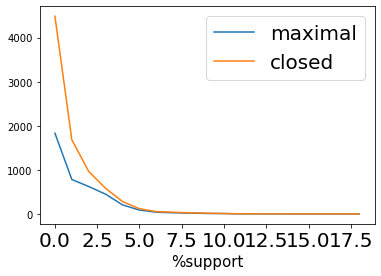

In [23]:
len_max_it = []
len_cl_it = []
for i in range(2, 20+1):
    max_itemsets = apriori(X, target='m', supp=i, zmin=3)
    cl_itemsets = apriori(X, target='c', supp=i, zmin=3)
    len_max_it.append( len(max_itemsets)  )
    len_cl_it.append( len(cl_itemsets) )
    
plt.plot(len_max_it, label='maximal')
plt.plot(len_cl_it, label='closed')
plt.legend(fontsize=20)
plt.xticks(fontsize=20)
plt.xlabel('%support', fontsize=15)

plt.show()

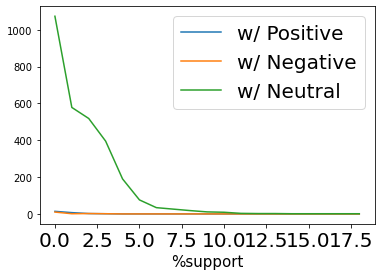

In [95]:
#papu da quello che ho capito qui mi sa fa schifo, 
#perché la lunghezza degli itemset più frequenti
#come si vede sopra scende a 0 quando la percentuale di support supera il 50%, da quello che ho capito è poco  
filter_1 = []
filter_2 = []
filter_3 = []
for i in range(2, 20+1):
    max_itemsets = apriori(X, target='m', supp=i, zmin=3)
    
    filter_1.append( len([item for item in max_itemsets if 'Positive' in item[0]])  )
    filter_2.append( len([item for item in max_itemsets if 'Negative' in item[0]]) )
    filter_3.append( len([item for item in max_itemsets if 'Neutral' in item[0]]) )
    #filtrare per qualcosa di interessante, (esempio lunghezza item set sopravvissuti e non sopravvissuti)
plt.plot(filter_1, label='w/ Positive')
plt.plot(filter_2, label='w/ Negative')
plt.plot(filter_3, label='w/ Neutral')
plt.legend(fontsize=20)
plt.xticks(fontsize=20)
plt.xlabel('%support', fontsize=15)

plt.show()
# qui sotto si vedrà invece che la lunghezza degli itemsets frequenti è 0 per target positive e negative 
# indipendentemente dalla percentuale di support, questa cosa non mi pare corretta
# avrò sicuramente sbagliato qualcosa nei valori

In [96]:
rules = apriori(X, target='r', supp=10, zmin=3, conf=60, report='aScl')

In [71]:
rules[:5]

[('(6.032, 6.941]_Imageability',
  ('(5.971, 6.938]_Concreteness', '(5.29, 6.088]_Valence', 'Neutral'),
  424,
  9.05595899188381,
  0.8888888888888888,
  3.5570750237416906),
 ('(6.032, 6.941]_Imageability',
  ('(5.971, 6.938]_Concreteness', '(5.29, 6.088]_Valence'),
  426,
  9.098675779581376,
  0.8893528183716075,
  3.5589315347144157),
 ('Neutral',
  ('(5.971, 6.938]_Concreteness', '(5.29, 6.088]_Valence'),
  477,
  10.187953865869288,
  0.9958246346555324,
  1.168241277739214),
 ('(1.374, 3.438]_Semsize',
  ('(5.971, 6.938]_Concreteness',
   '(6.032, 6.941]_Imageability',
   '(1.2180000000000002, 3.114]_Aoa',
   'Neutral'),
  320,
  6.834686031610423,
  0.6130268199233716,
  2.4427162305372137),
 ('(1.374, 3.438]_Semsize',
  ('(5.971, 6.938]_Concreteness',
   '(6.032, 6.941]_Imageability',
   '(1.2180000000000002, 3.114]_Aoa'),
  326,
  6.962836394703118,
  0.6174242424242424,
  2.4602385557704705)]

In [72]:
rules[0][0], rules[0][1]

('(6.032, 6.941]_Imageability',
 ('(5.971, 6.938]_Concreteness', '(5.29, 6.088]_Valence', 'Neutral'))

In [73]:
# asbolute support
rules[0][2]

424

In [74]:
# support as percentage
rules[0][3]

9.05595899188381

In [75]:
# confidence
rules[0][4]

0.8888888888888888

In [76]:
# lift
rules[0][5]

3.5570750237416906

In [83]:
#find all the rules dove è implicata la variabile target
for r in rules:
    if r[0] == 'Neutral' or 'Positive' or 'Negative':
        print(r)


('(6.032, 6.941]_Imageability', ('(5.971, 6.938]_Concreteness', '(5.29, 6.088]_Valence', 'Neutral'), 424, 9.05595899188381, 0.8888888888888888, 3.5570750237416906)
('(6.032, 6.941]_Imageability', ('(5.971, 6.938]_Concreteness', '(5.29, 6.088]_Valence'), 426, 9.098675779581376, 0.8893528183716075, 3.5589315347144157)
('Neutral', ('(5.971, 6.938]_Concreteness', '(5.29, 6.088]_Valence'), 477, 10.187953865869288, 0.9958246346555324, 1.168241277739214)
('(1.374, 3.438]_Semsize', ('(5.971, 6.938]_Concreteness', '(6.032, 6.941]_Imageability', '(1.2180000000000002, 3.114]_Aoa', 'Neutral'), 320, 6.834686031610423, 0.6130268199233716, 2.4427162305372137)
('(1.374, 3.438]_Semsize', ('(5.971, 6.938]_Concreteness', '(6.032, 6.941]_Imageability', '(1.2180000000000002, 3.114]_Aoa'), 326, 6.962836394703118, 0.6174242424242424, 2.4602385557704705)
('(1.2180000000000002, 3.114]_Aoa', ('(5.971, 6.938]_Concreteness', '(6.032, 6.941]_Imageability', '(1.374, 3.438]_Semsize'), 326, 6.962836394703118, 0.60036

In [84]:
[r for r in rules if r[0] == 'Positive' or 'Negative' or 'Neutral'][0]

('(6.032, 6.941]_Imageability',
 ('(5.971, 6.938]_Concreteness', '(5.29, 6.088]_Valence', 'Neutral'),
 424,
 9.05595899188381,
 0.8888888888888888,
 3.5570750237416906)

In [85]:
print( 'to_predict:', [r for r in rules if r[0] == 'Neutral' or 'Positive' or 'Negative'][0][0])
print( 'how?', [r for r in rules if r[0] == 'Neutral' or 'Positive' or 'Negative'][0][1])

to_predict: (6.032, 6.941]_Imageability
how? ('(5.971, 6.938]_Concreteness', '(5.29, 6.088]_Valence', 'Neutral')


In [86]:
#overview
filter_1 = []
filter_2 = []
filter_3 = []
len_r = []
for i in range(1, 20+1): #support values
    len_r_wrt_i = []
    for j in range(60, 80+1): #confidence
        rules = apriori(X, target='r', supp=i, zmin=3, conf=j, report='aScl')
        
        len_r_wrt_i.append(len(rules)) # study your characteristics/properties here
         
        filter_1.append( len([item for item in max_itemsets if 'Positive' in item[0]])  )
        filter_2.append( len([item for item in max_itemsets if 'Negative' in item[0]]) )
        filter_3.append( len([item for item in max_itemsets if 'Neutral' in item[0]]) )
        
    len_r.append(len_r_wrt_i)

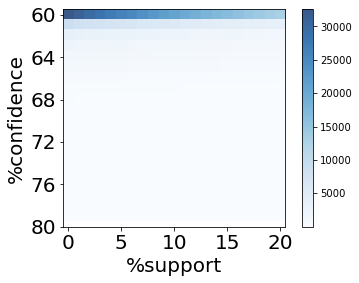

In [89]:
plt.imshow( len_r, cmap='Blues', alpha=0.8 )
plt.xlabel('%support', fontsize=20)
plt.ylabel('%confidence', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks( np.arange(0,20+1,4), np.arange(60,80+1,4), fontsize=20  )
plt.colorbar()

plt.show()